In [1]:
%pylab notebook
import healpy as h
import numpy.polynomial.legendre as lgdr
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk

Populating the interactive namespace from numpy and matplotlib


In [2]:
nside=64
y=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=2500)
lmax=3*nside ; odisc=min(180,(24./lmax)*180.) ; print odisc
cle=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")[1][:lmax+1]
clb=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")[2][:lmax+1]
ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)

22.5


In [22]:
y.calc_qu2eb_rad_kernel(lmin=2,lmax=3*nside)
y.calc_qu2queb_rad_kernel(lmin=2,lmax=3*nside)
y.setup_fn_rad_ker()

<IPython.core.display.Javascript object>


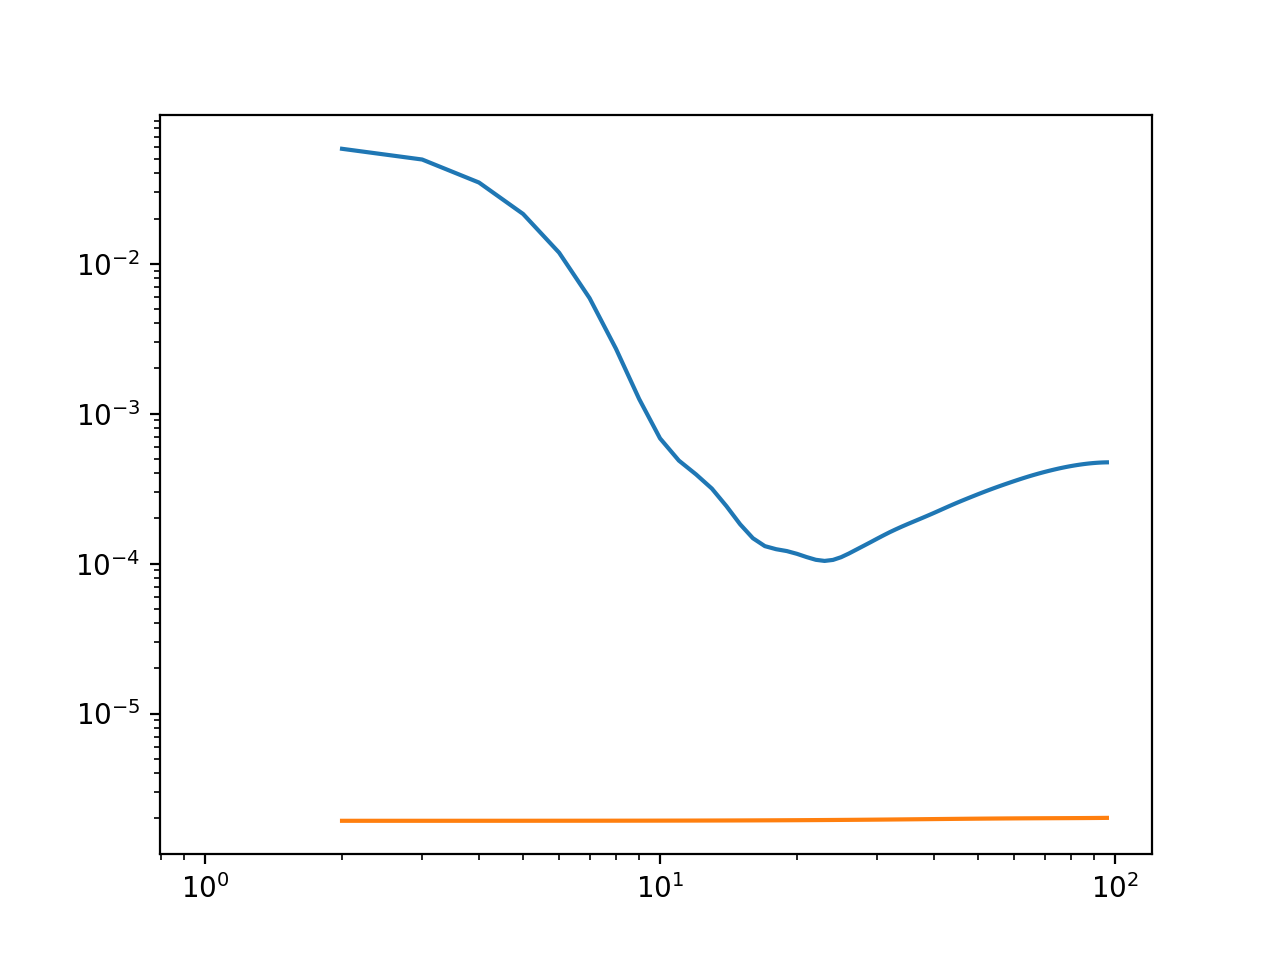

[]

In [3]:
figure()
plot(ell,cle)
plot(ell,clb)
loglog()

In [8]:
def stepfn(r,rcutoff):
    f=zeros(r.size,float)
    f[r<=rcutoff]=1
    return f

In [23]:
rctheta=y.fn_rad_ker(dtheta*pi/180.)
recrcl=lgdr.legfit(cos_dtheta,rctheta,lmax)*4.*pi/(2.*ell+1)

<IPython.core.display.Javascript object>


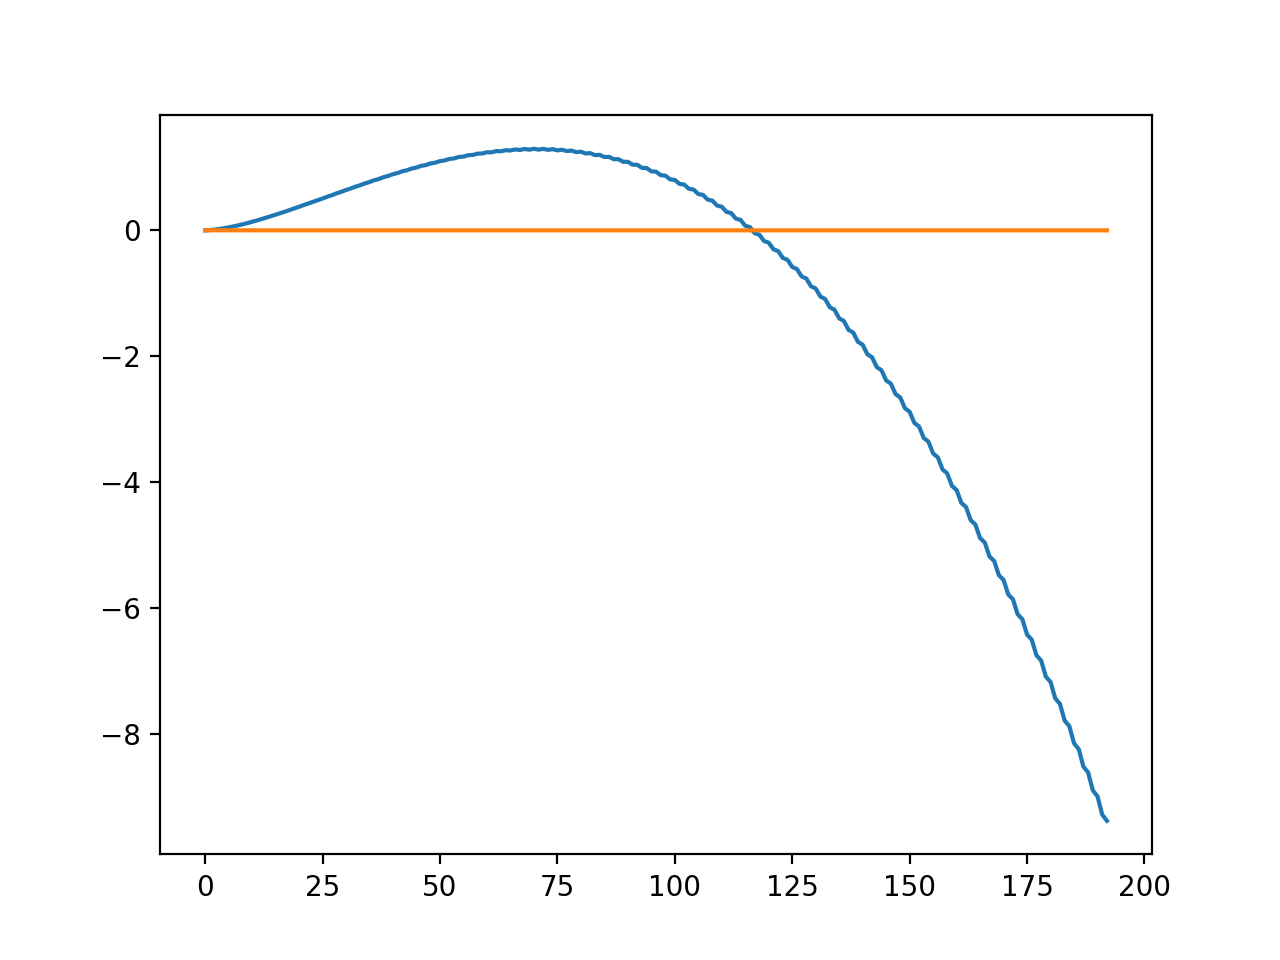

In [29]:
figure()
plot(ell,ell*(ell+1)*recrcl)
plot(ell,1e-3/sqrt(2.*ell+1))
#semilogy()

<IPython.core.display.Javascript object>


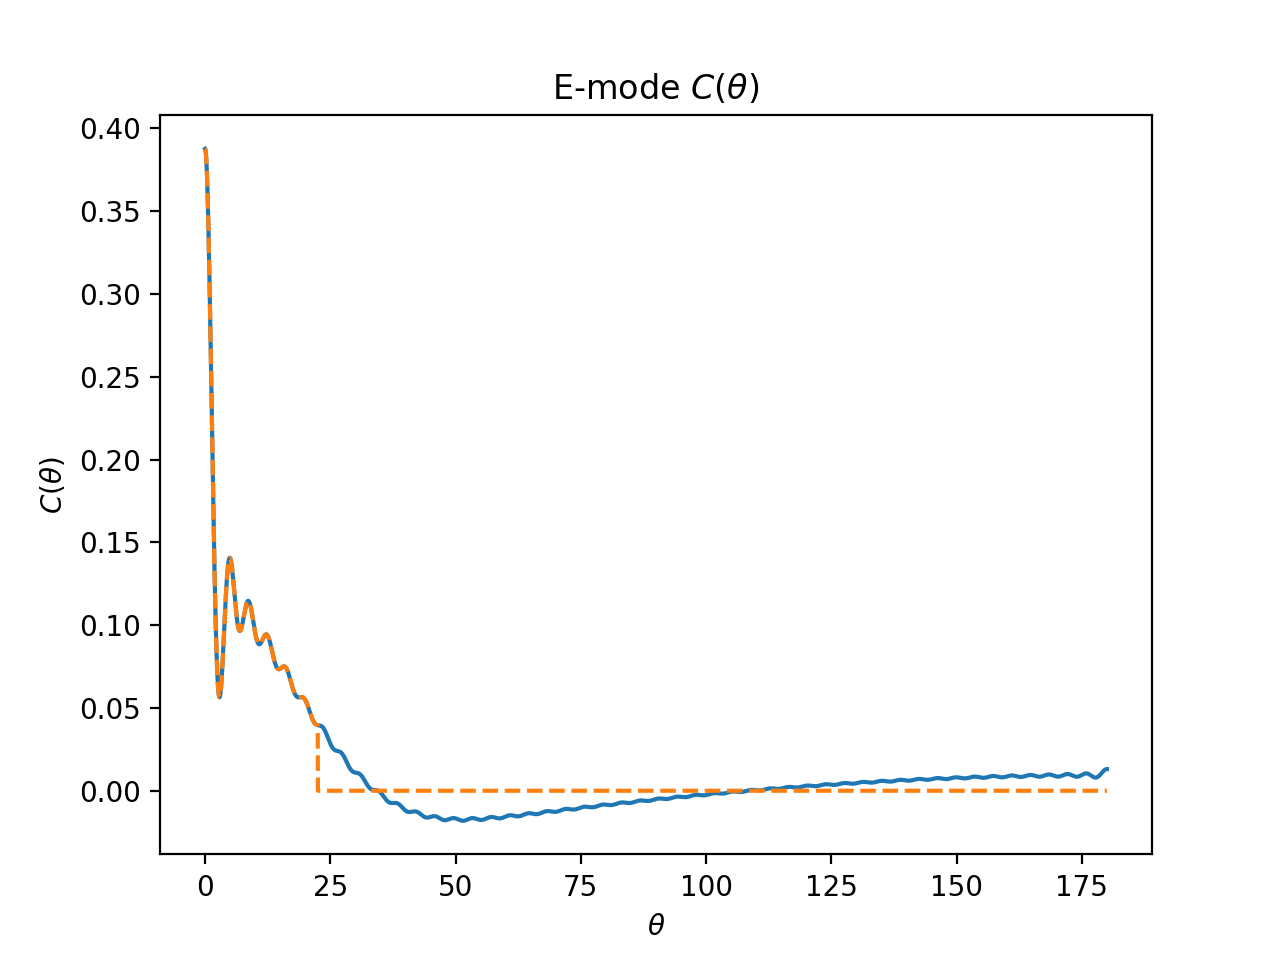

<IPython.core.display.Javascript object>


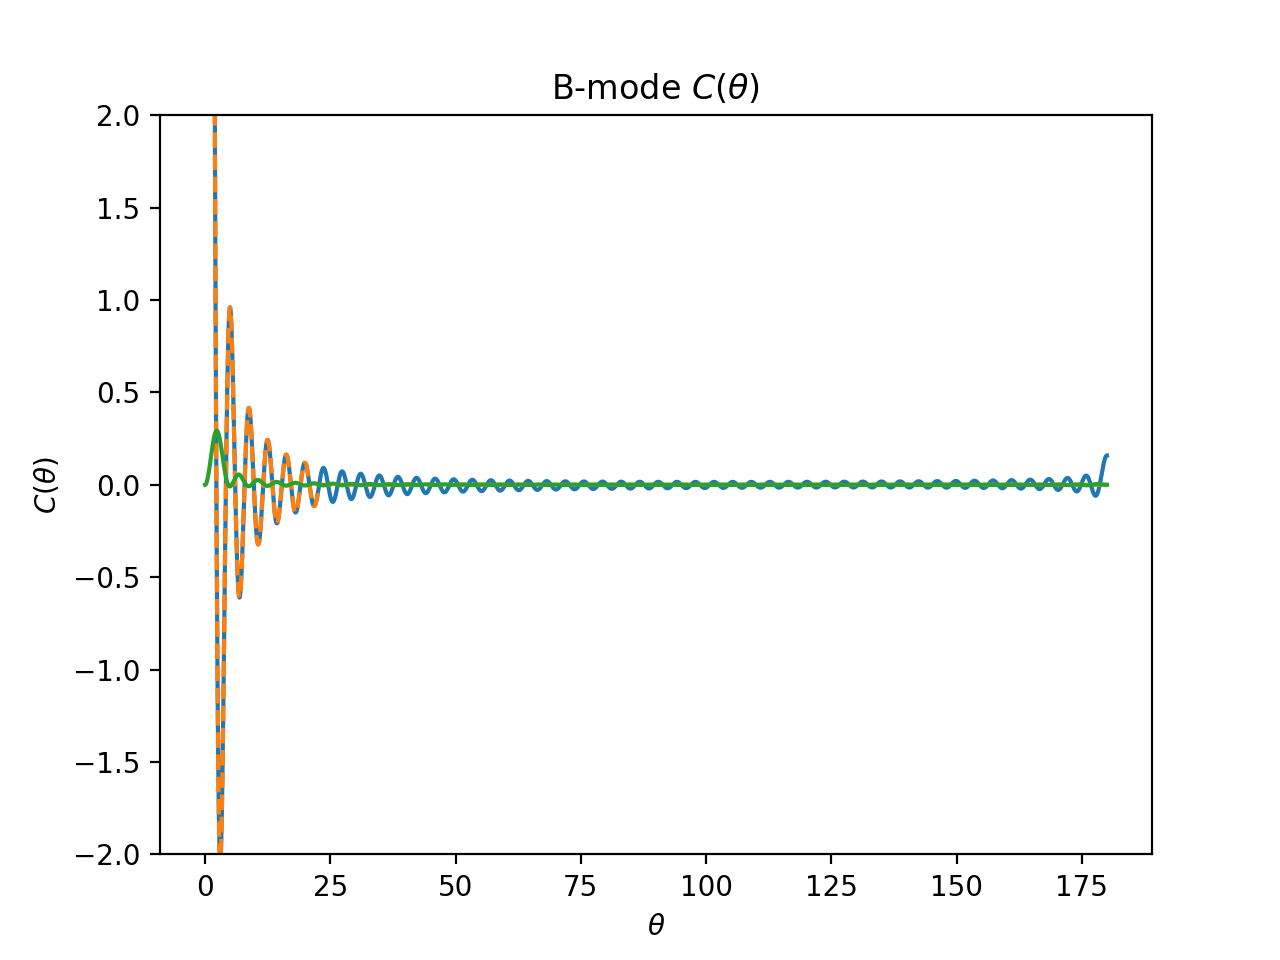

(-2, 2)

In [9]:
dtheta=linspace(0.,180.,10000)
cos_dtheta=cos(dtheta*pi/180.)

ftheta=stepfn(dtheta,0.5*odisc)
ecoeff=cle*((2*ell+1)/(4.*pi))
ectheta=lgdr.legval(cos_dtheta,ecoeff,tensor=False)
ecthetap=ectheta*ftheta

fl=lgdr.legfit(cos_dtheta,ftheta,lmax)#*4.*pi/(2.*ell+1)

bcoeff=clb*((2*ell+1)/(4.*pi))
bctheta=lgdr.legval(cos_dtheta,bcoeff,tensor=False)
bcthetap=bctheta*ftheta

figure()
title(r"E-mode $C(\theta)$")
plot(dtheta,ectheta)
plot(dtheta,ecthetap,"--")
xlabel(r"$\theta$")
ylabel(r"$C(\theta)$")

figure()
title(r"B-mode $C(\theta)$")
plot(dtheta,bctheta*1e4)
plot(dtheta,bcthetap*1e4,"--")
xlabel(r"$\theta$")
ylabel(r"$C(\theta)$")
ylim(-2,2)

In [32]:
fl=lgdr.legfit(cos_dtheta,ftheta,lmax)#*4.*pi/(2.*ell+1)
reccle=lgdr.legfit(cos_dtheta,ectheta,lmax)*4.*pi/(2.*ell+1)
recclep=lgdr.legfit(cos_dtheta,ecthetap,lmax)*4.*pi/(2.*ell+1)
recclb=lgdr.legfit(cos_dtheta,bctheta,lmax)*4.*pi/(2.*ell+1)
recclbp=lgdr.legfit(cos_dtheta,bcthetap,lmax)*4.*pi/(2.*ell+1)

<IPython.core.display.Javascript object>


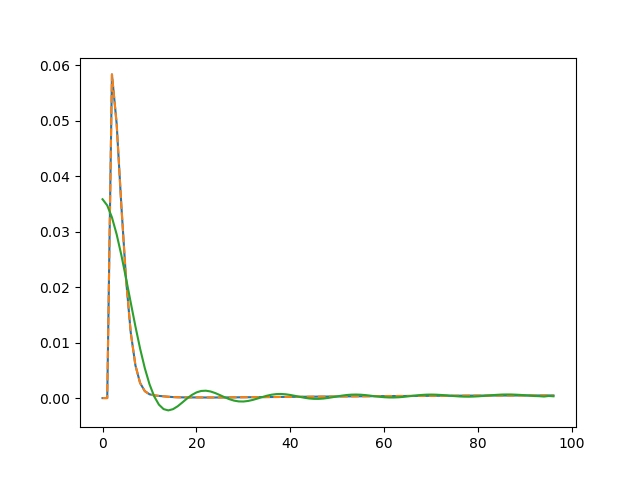

<IPython.core.display.Javascript object>


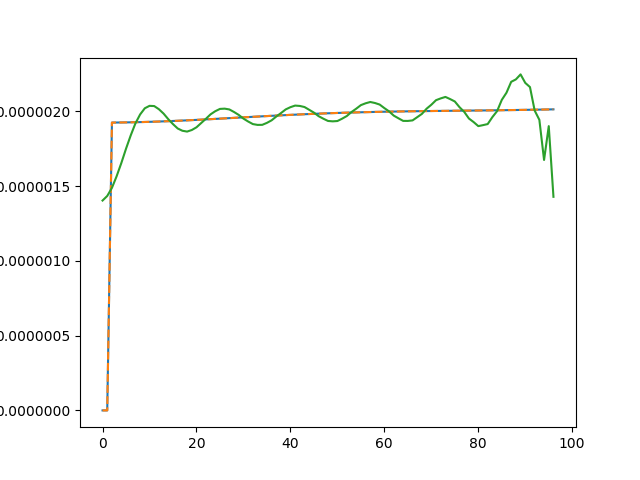

In [33]:
figure()
plot(ell,cle)
plot(ell,reccle,"--")
plot(ell,recclep)

figure()
plot(ell,clb)
plot(ell,recclb,"--")
plot(ell,recclbp)

<IPython.core.display.Javascript object>


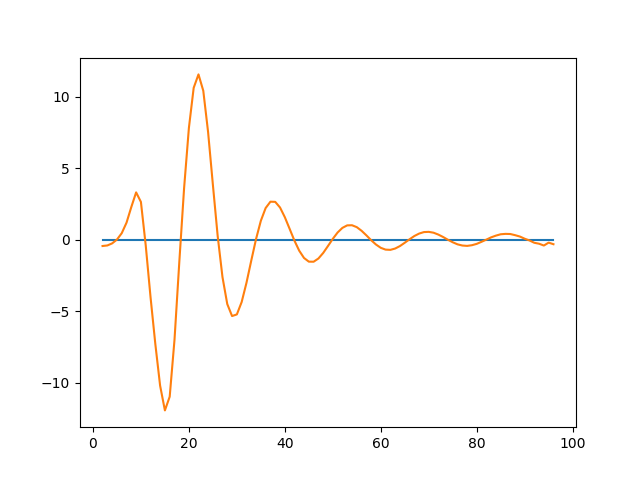

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


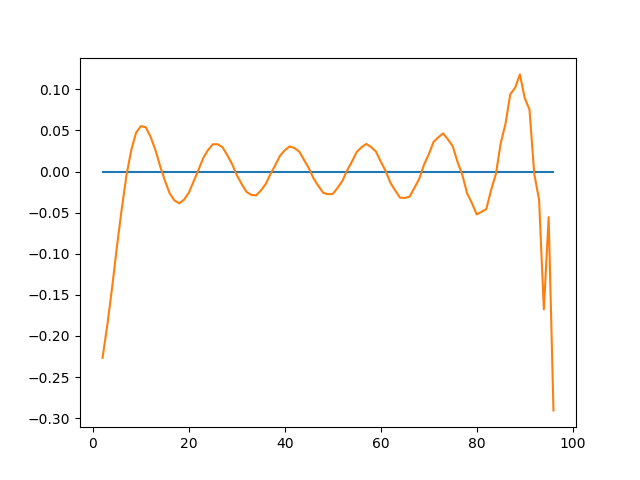

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide


In [17]:
figure()
plot(ell,(reccle-cle)/cle)
plot(ell,(recclep-cle)/cle)

figure()
plot(ell,(recclb-clb)/clb)
plot(ell,(recclbp-clb)/clb)